In [77]:
# depict the secant construction of
# the elliptic curve group law
import numpy as np
import matplotlib.pyplot as plt

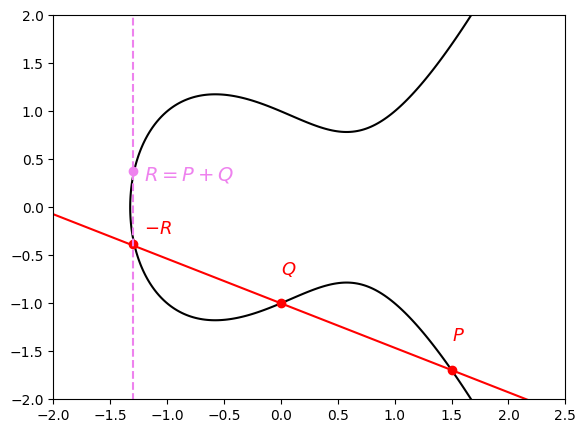

In [78]:
fig, ax = plt.subplots()

# make the margins smaller
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

a = -1
b = 1

x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
Z = Y**2 - X**3 - a*X - b
ax.contour(X,Y,Z,[0],colors='k')
ax.set_xlim(-2,2.5)
ax.set_ylim(-2,2)

def curve(x, sign):
    if x < 0:
        return sign*np.sqrt(-x**3 - a*x - b)
    else:
        return sign*np.sqrt(x**3 + a*x + b)
  
def secant(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    b = y1 - m*x1
    return m, b
  
def result(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    x3 = (m**2 - x1 - x2)/(1 + m**2)
    y3 = m*(x1 - x3) - y1
    return x3, y3

# plot the points labeling them as well
ax.plot(1.5, curve(1.5, -1), 'o', color='red')
ax.text(1.5, curve(1.5, -1)+0.3, r'$P$', color='red', fontsize=13)
ax.plot(0, curve(0, -1), 'o', color='red')
ax.text(0, curve(0, -1)+0.3, r'$Q$', color='red', fontsize=13)


# plot the secant line
m, b = secant(1.5, curve(1.5, -1), 0, curve(0, -1))
ax.plot(x, m*x + b, color='red')

# # plot the result
# x3, y3 = result(1.5, curve(1.5, -1), 0, curve(0, -1))
# ax.plot(x3, -y3, 'o', color='red')
ax.plot(-1.3, -0.38, 'o', color='red')
ax.text(-1.3+0.1, -0.38+0.1, r'$-R$', color='red', fontsize=13)

#draw vertical dashed line through -R
ax.plot([-1.3, -1.3], [-3.5, 3.5], '--', color='violet')

ax.plot(-1.3, 0.38, 'o', color='violet')
ax.text(-1.3+0.1, 0.38-0.1, r"$R = P + Q$", color='violet', fontsize=14)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

fig.savefig('grouplaw.png', dpi=300)